In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.options.display.float_format = "{:,.2f}".format

In [3]:
control = pd.read_csv('Results of sims/Sims/200524_5stepsLunch_0.05Base000_BunchedPoisson130_500Sims.csv', index_col = 0).T
control_2 = pd.read_csv('Results of sims/Sims/200526_5stepsLunch_0.05Base000_BunchedPoisson130_500Sims.csv', index_col = 0).T

In [4]:
control = pd.concat([control, control_2])

In [5]:
control['Staff_Type'] = '0-0-0'

In [6]:
control['Test'] = 'Control'

In [7]:
base122 = pd.read_csv('Results of sims/Sims/200524_5stepsLunch_0.05Base122_BunchedPoisson130_500Sims.csv', index_col = 0).T
base132 = pd.read_csv('Results of sims/Sims/200524_5stepsLunch_0.05Base132_BunchedPoisson130_500Sims.csv', index_col = 0).T
base222 = pd.read_csv('Results of sims/Sims/200524_5stepsLunch_0.05Base222_BunchedPoisson130_500Sims.csv', index_col = 0).T
base232 = pd.read_csv('Results of sims/Sims/200524_5stepsLunch_0.05Base232_BunchedPoisson130_500Sims.csv', index_col = 0).T

In [8]:
base122_2 = pd.read_csv('Results of sims/Sims/200526_5stepsLunch_0.05Base122_BunchedPoisson130_500Sims.csv', index_col = 0).T
base132_2 = pd.read_csv('Results of sims/Sims/200526_5stepsLunch_0.05Base132_BunchedPoisson130_500Sims.csv', index_col = 0).T
base222_2 = pd.read_csv('Results of sims/Sims/200526_5stepsLunch_0.05Base222_BunchedPoisson130_500Sims.csv', index_col = 0).T
base232_2 = pd.read_csv('Results of sims/Sims/200526_5stepsLunch_0.05Base232_BunchedPoisson130_500Sims.csv', index_col = 0).T

In [9]:
base122 = pd.concat([base122, base122_2])
base132 = pd.concat([base132, base132_2])
base222 = pd.concat([base222, base222_2])
base232 = pd.concat([base232, base232_2])

In [10]:
base122['Staff_Type'] = '1-2-2'
base132['Staff_Type'] = '1-3-2'
base222['Staff_Type'] = '2-2-2'
base232['Staff_Type'] = '2-3-2'

In [12]:
base = pd.concat([base122, base222, base132, base232])

In [17]:
base['Test'] = 'Non-respiratory'

In [14]:
covid122 = pd.read_csv('Results of sims/Sims/200524_5stepsLunch_0.05Covid122_BunchedPoisson130_10kSims.csv', index_col = 0).T
covid132 = pd.read_csv('Results of sims/Sims/200524_5stepsLunch_0.05Covid132_BunchedPoisson130_10kSims.csv', index_col = 0).T
covid222 = pd.read_csv('Results of sims/Sims/200524_5stepsLunch_0.05Covid222_BunchedPoisson130_10kSims.csv', index_col = 0).T
covid232 = pd.read_csv('Results of sims/Sims/200524_5stepsLunch_0.05Covid232_BunchedPoisson130_10kSims.csv', index_col = 0).T

In [15]:
covid122['Staff_Type'] = '1-2-2'
covid132['Staff_Type'] = '1-3-2'
covid222['Staff_Type'] = '2-2-2'
covid232['Staff_Type'] = '2-3-2'

In [16]:
covid = pd.concat([covid122, covid222, covid132, covid232])

In [18]:
covid['Test'] = 'Respiratory'

In [20]:
all_runs = pd.concat([control, base, covid])

In [26]:
all_runs = all_runs.head().reset_index().set_index(['Test', 'Staff_Type'])
all_runs = all_runs.drop('index', axis = 1)

In [27]:
all_runs.to_csv('Results of sims/Sims/280520_5stepsLunch_AllSims_ControlRespNonResp.csv')

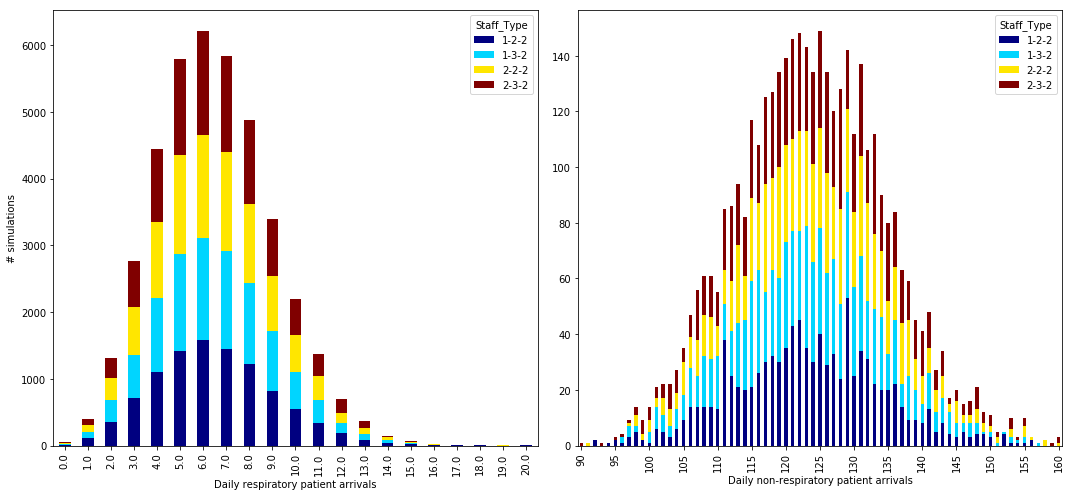

Respiratory (40,000 total sims)
Mean arrivals: 6.50
Non-respiratory (4,000 total sims)
Mean arrivals: 123.50


In [494]:
fig, (ax1, ax2)= plt.subplots(ncols = 2, figsize = (15, 7))
covid.groupby('Staff_Type')['Arrivals_check_in'].value_counts().unstack().T.plot(kind = 'bar',\
                                                    stacked = True, colormap = 'jet', ax = ax1)
base.groupby('Staff_Type')['Arrivals_check_in'].value_counts().unstack().T.plot(kind = 'bar',\
                                                    stacked = True, colormap = 'jet', ax = ax2)
ax1.set_xlabel('Daily respiratory patient arrivals')
ax1.set_ylabel('# simulations')
ax2.set_xlabel('Daily non-respiratory patient arrivals')
ax2.set_xticks(np.arange(0, 71, 5))
ax2.set_xticklabels(np.arange(90, 161, 5))
plt.tight_layout()
plt.show()
print ('Respiratory ({:,} total sims)'.format(covid.shape[0]))
print ('Mean arrivals: {:.2f}'.format(130 * 0.05))
print ('Non-respiratory ({:,} total sims)'.format(base.shape[0]))
print ('Mean arrivals: {:.2f}'.format(130 * 0.95))

In [497]:
mean_wait_by_n_arrivals = covid.groupby(['Staff_Type', 'Arrivals_check_in'])[wait_cols].mean().unstack().T
max_wait_by_n_arrivals = covid.groupby(['Staff_Type', 'Arrivals_check_in'])[max_wait_cols].mean().unstack().T

In [498]:
steps = ['check_in', 'refine_complaint', 'exam', 'follow_up', 'checkout']

In [499]:
mean_wait_dict = {}
for s in steps :
    mean_wait = mean_wait_by_n_arrivals[[s in i for i in mean_wait_by_n_arrivals.index.get_level_values(0)]]
    mean_wait.index = mean_wait.index.droplevel()
    mean_wait_dict[s] = mean_wait

In [500]:
max_wait_dict = {}
for s in steps :
    max_wait = max_wait_by_n_arrivals[[s in i for i in max_wait_by_n_arrivals.index.get_level_values(0)]]
    max_wait.index = max_wait.index.droplevel()
    max_wait_dict[s] = max_wait

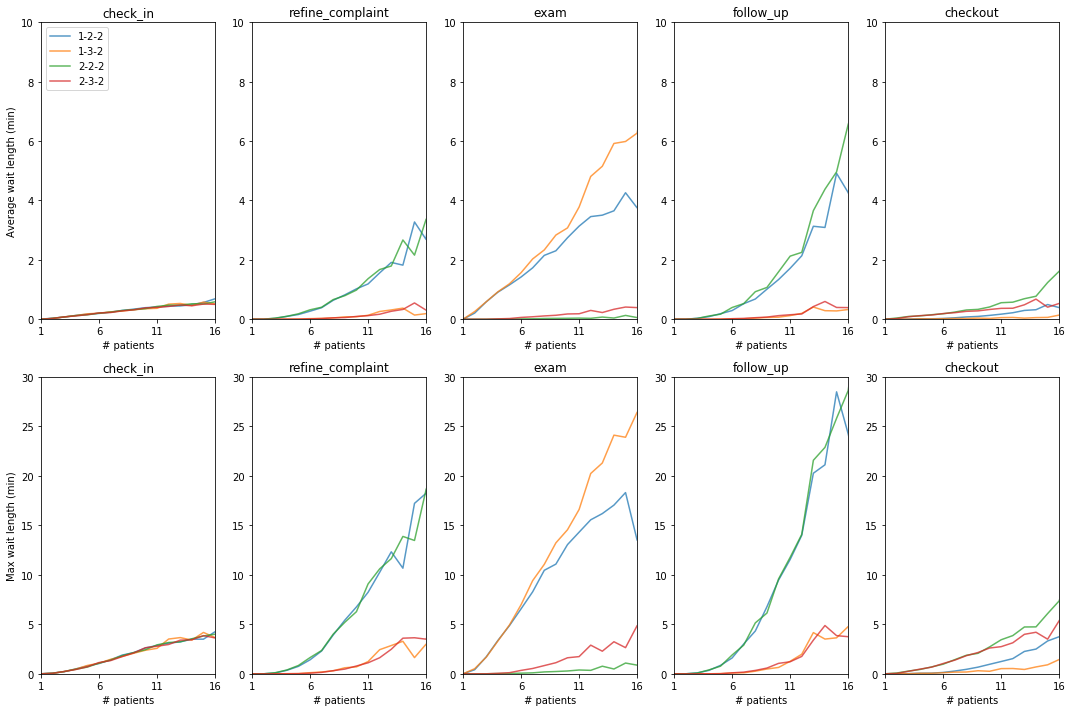

In [501]:
fig, axs = plt.subplots(ncols = 5, nrows = 2, figsize = (15, 10))
axs = axs.ravel()
for i, s in enumerate(steps) :
    mean_wait_dict[s].plot(alpha = 0.75, ax = axs[i], legend = False)
    axs[i].set_xlim(1, 16)
    axs[i].set_xticks(np.arange(1, 17, 5))
    axs[i].set_ylim(0, 10)
    axs[i].set_title(s)
    axs[i].set_xlabel('# patients')
axs[0].set_ylabel('Average wait length (min)')
for i, s in enumerate(steps) :
    i += 5
    max_wait_dict[s].plot(alpha = 0.75, ax = axs[i], legend = False)
    axs[i].set_xlim(1, 16)
    axs[i].set_xticks(np.arange(1, 17, 5))
    axs[i].set_ylim(0, 30)
    axs[i].set_title(s)
    axs[i].set_xlabel('# patients')
axs[0].set_ylabel('Average wait length (min)')
axs[0].legend(loc = 'upper left')
axs[5].set_ylabel('Max wait length (min)')
plt.tight_layout()
plt.show()

In [502]:
base_mean_wait_by_n_arrivals = base_control.groupby(['Staff_Type', 'Arrivals_check_in'])[wait_cols].mean().unstack().T
base_max_wait_by_n_arrivals = base_control.groupby(['Staff_Type', 'Arrivals_check_in'])[max_wait_cols].mean().unstack().T

In [503]:
base_mean_wait_dict = {}
for s in steps :
    mean_wait = base_mean_wait_by_n_arrivals[[s in i for i in base_mean_wait_by_n_arrivals.index.get_level_values(0)]]
    mean_wait.index = mean_wait.index.droplevel()
    base_mean_wait_dict[s] = mean_wait

In [504]:
base_max_wait_dict = {}
for s in steps :
    max_wait = base_max_wait_by_n_arrivals[[s in i for i in base_max_wait_by_n_arrivals.index.get_level_values(0)]]
    max_wait.index = max_wait.index.droplevel()
    base_max_wait_dict[s] = max_wait

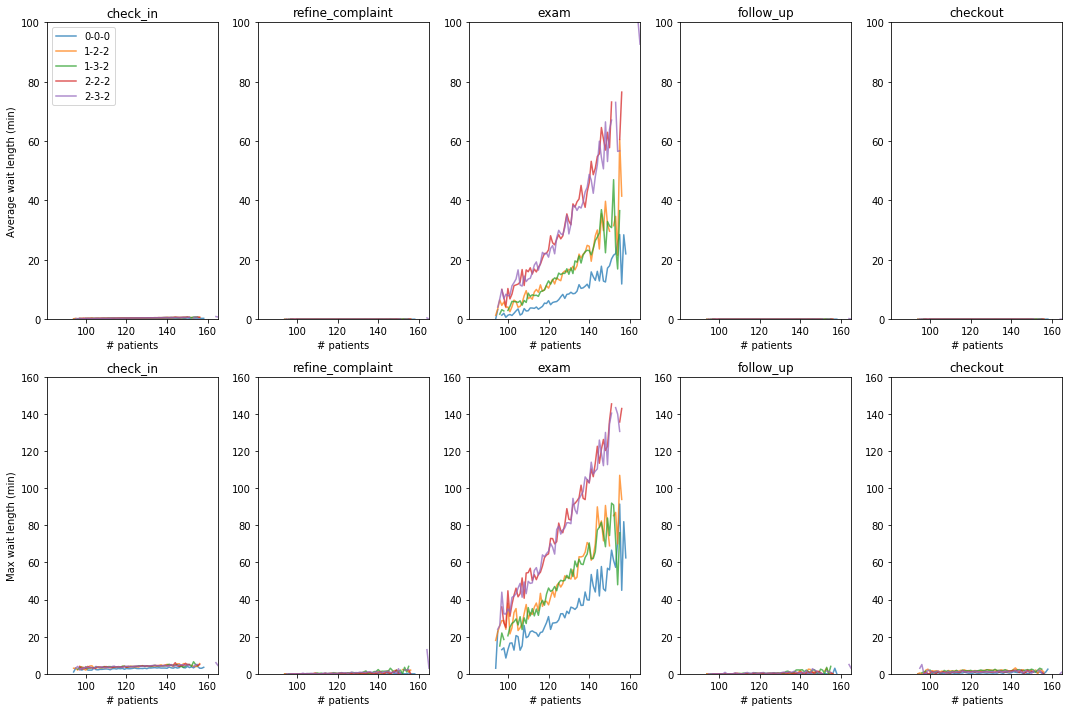

In [505]:
fig, axs = plt.subplots(ncols = 5, nrows = 2, figsize = (15, 10))
axs = axs.ravel()
for i, s in enumerate(steps) :
    base_mean_wait_dict[s].plot(alpha = 0.75, ax = axs[i], legend = False)
    axs[i].set_ylim(0, 100)
    axs[i].set_title(s)
    axs[i].set_xlabel('# patients')
axs[0].set_ylabel('Average wait length (min)')
for i, s in enumerate(steps) :
    i += 5
    base_max_wait_dict[s].plot(alpha = 0.75, ax = axs[i], legend = False)
    axs[i].set_ylim(0, 160)
    axs[i].set_title(s)
    axs[i].set_xlabel('# patients')
axs[0].set_ylabel('Average wait length (min)')
axs[0].legend(loc = 'upper left')
axs[5].set_ylabel('Max wait length (min)')
plt.tight_layout()
plt.show()

In [506]:
print ('control', np.percentile(control['Arrivals_check_in'], [5, 20, 50, 80, 95]))
print ('base all', np.percentile(base['Arrivals_check_in'], [5, 20, 50, 80, 95]))
print ('122', np.percentile(base122['Arrivals_check_in'], [5, 20, 50, 80, 95]))
print ('132', np.percentile(base132['Arrivals_check_in'], [5, 20, 50, 80, 95]))
print ('222', np.percentile(base222['Arrivals_check_in'], [5, 20, 50, 80, 95]))
print ('232', np.percentile(base232['Arrivals_check_in'], [5, 20, 50, 80, 95]))

control [109. 117. 127. 137. 146.]
base all [106.  114.  123.5 133.  142. ]
122 [106. 114. 123. 132. 141.]
132 [106. 114. 123. 132. 142.]
222 [106. 115. 124. 133. 142.]
232 [106. 114. 124. 134. 143.]


In [525]:
perc0595 = (base_control['Arrivals_check_in'] >= 106) & (base_control['Arrivals_check_in'] <= 142)
perc2080 = (base_control['Arrivals_check_in'] >= 114) & (base_control['Arrivals_check_in'] <= 133)

In [530]:
base_control[perc0595].shape[0]

4498

In [528]:
base_control[perc2080].shape

(3114, 40)

In [531]:
base_control0595 = base_control[perc0595]

In [540]:
covid_totals = covid0595.groupby(['Staff_Type'])[['Total_service_time', 'Total_waiting_time']].quantile([0.05, 0.5, 0.95])
covid_totals['Total_system_time'] = covid_totals.sum(axis = 1)
covid_totals

Total_service_time  Total_waiting_time  Total_system_time
Staff_Type                                                                
1-2-2      0.05               45.33                0.00              45.33
           0.50               52.25                1.78              54.03
           0.95               59.75                9.50              69.25
1-3-2      0.05               45.33                0.00              45.33
           0.50               52.20                1.43              53.63
           0.95               59.80                7.00              66.80
2-2-2      0.05               45.60                0.00              45.60
           0.50               52.20                0.43              52.63
           0.95               59.80                6.20              66.00
2-3-2      0.05               45.50                0.00              45.50
           0.50               52.14                0.22              52.37
           0.95               60.00                2.12              62.12

In [541]:
base_totals = base0595.groupby(['Staff_Type'])[['Total_service_time', 'Total_waiting_time']].quantile([0.05, 0.5, 0.95])
base_totals['Total_system_time'] = base_totals.sum(axis = 1)
base_totals

Total_service_time  Total_waiting_time  Total_system_time
Staff_Type                                                                
1-2-2      0.05               63.65                4.21              67.86
           0.50               66.62               12.69              79.31
           0.95               69.42               27.93              97.34
1-3-2      0.05               64.12                4.08              68.20
           0.50               66.68               12.80              79.48
           0.95               69.22               27.29              96.52
2-2-2      0.05               64.07               10.94              75.01
           0.50               66.51               26.21              92.71
           0.95               69.39               53.87             123.26
2-3-2      0.05               63.99                9.68              73.67
           0.50               66.52               25.55              92.07
           0.95               68.95               50.65             119.60

In [542]:
control_totals = control0595.groupby('Staff_Type')[['Total_service_time', 'Total_waiting_time']].quantile([0.05, 0.5, 0.95])
control_totals['Total_system_time'] = control_totals.sum(axis = 1)
control_totals

Total_service_time  Total_waiting_time  Total_system_time
Staff_Type                                                                
0-0-0      0.05               64.26                1.68              65.94
           0.50               66.79                6.51              73.30
           0.95               69.32               16.96              86.27

In [554]:
diffs = list()
for i in base_totals.index.unique(level = 0) :
    diffs.append(base_totals.loc[i]['Total_system_time'].values - control_totals['Total_system_time'].values)

In [582]:
holder = list()
for z in diffs :
    h = list()
    for a, b in zip([0.05, 0.50, 0.95], z) :
        h.append([a, b])
    holder.append(h)

In [583]:
data = list()
for a, b in zip(base_totals.index.unique(level = 0), holder) :
    for new in b :
        new.insert(0, a)
        data.append(new)

In [585]:
diffs_df = pd.DataFrame(data)
diffs_df.columns = ['Staff_Type', 'Percentile', 'Total_system_time']
diffs_df.set_index(['Staff_Type', 'Percentile'])

Total_system_time
Staff_Type Percentile                   
1-2-2      0.05                     1.92
           0.50                     6.01
           0.95                    11.07
1-3-2      0.05                     2.26
           0.50                     6.18
           0.95                    10.24
2-2-2      0.05                     9.07
           0.50                    19.42
           0.95                    36.99
2-3-2      0.05                     7.73
           0.50                    18.77
           0.95                    33.32

In [424]:
covidequals0595 = covid0595[(covid0595['Arrivals_check_in'] == 3) | (covid0595['Arrivals_check_in'] == 6) | (covid0595['Arrivals_check_in'] == 11)]

In [426]:
covidequals0595_totals = covidequals0595.groupby(['Staff_Type', 'Arrivals_check_in'])[['Total_service_time', 'Total_waiting_time']].mean()
covidequals0595_totals['Total_system_time'] = covidequals0595_totals.sum(axis = 1)
covidequals0595_totals

Total_service_time  Total_waiting_time  \
Staff_Type Arrivals_check_in                                           
1-2-2      3.00                            52.17                0.72   
           6.00                            52.38                2.20   
           11.00                           52.62                6.62   
1-3-2      3.00                            52.21                0.67   
           6.00                            52.54                1.82   
           11.00                           52.19                4.45   
2-2-2      3.00                            52.00                0.23   
           6.00                            52.43                1.11   
           11.00                           52.31                4.51   
2-3-2      3.00                            52.59                0.16   
           6.00                            52.36                0.49   
           11.00                           52.28                1.22   

                              Total_system_time  
Staff_Type Arrivals_check_in                     
1-2-2      3.00                           52.89  
           6.00                           54.58  
           11.00                          59.24  
1-3-2      3.00                           52.87  
           6.00                           54.36  
           11.00                          56.65  
2-2-2      3.00                           52.23  
           6.00                           53.53  
           11.00                          56.82  
2-3-2      3.00                           52.75  
           6.00                           52.85  
           11.00                          53.49

In [431]:
covidequals0595_waits = covidequals0595.groupby(['Staff_Type', 'Arrivals_check_in'])[wait_cols].mean()
covidequals0595_waits['Total_wait_time'] = covidequals0595_waits.sum(axis = 1)
covidequals0595_waits.columns = ['Check_in', 'Refine_complaint', 'Exam', 'Follow_up', 'Checkout', 'Total_wait']
covidequals0595_waits

Check_in  Refine_complaint  Exam  Follow_up  \
Staff_Type Arrivals_check_in                                                
1-2-2      3.00                   0.07              0.03  0.59       0.03   
           6.00                   0.19              0.27  1.42       0.29   
           11.00                  0.41              1.19  3.14       1.72   
1-3-2      3.00                   0.08              0.00  0.59       0.00   
           6.00                   0.20              0.02  1.57       0.01   
           11.00                  0.37              0.13  3.78       0.12   
2-2-2      3.00                   0.08              0.04  0.00       0.03   
           6.00                   0.20              0.32  0.01       0.39   
           11.00                  0.43              1.36  0.04       2.12   
2-3-2      3.00                   0.08              0.00  0.00       0.00   
           6.00                   0.21              0.01  0.06       0.02   
           11.00                  0.40              0.12  0.18       0.15   

                              Checkout  Total_wait  
Staff_Type Arrivals_check_in                        
1-2-2      3.00                   0.01        0.72  
           6.00                   0.02        2.20  
           11.00                  0.17        6.62  
1-3-2      3.00                   0.00        0.67  
           6.00                   0.02        1.82  
           11.00                  0.05        4.45  
2-2-2      3.00                   0.09        0.23  
           6.00                   0.18        1.11  
           11.00                  0.56        4.51  
2-3-2      3.00                   0.08        0.16  
           6.00                   0.19        0.49  
           11.00                  0.37        1.22

In [432]:
covidequals0595_maxwaits = covidequals0595.groupby(['Staff_Type', 'Arrivals_check_in'])[max_wait_cols].mean()
covidequals0595_maxwaits['Total_wait_time'] = covidequals0595_maxwaits.sum(axis = 1)
covidequals0595_maxwaits.columns = ['Check_in', 'Refine_complaint', 'Exam', 'Follow_up', 'Checkout', 'Total_wait']
covidequals0595_maxwaits

Check_in  Refine_complaint  Exam  Follow_up  \
Staff_Type Arrivals_check_in                                                
1-2-2      3.00                   0.21              0.08  1.71       0.09   
           6.00                   1.04              1.41  6.57       1.60   
           11.00                  2.87              8.24 14.32      11.56   
1-3-2      3.00                   0.23              0.00  1.68       0.00   
           6.00                   1.07              0.11  6.98       0.08   
           11.00                  2.57              1.24 16.61       1.26   
2-2-2      3.00                   0.23              0.11  0.00       0.08   
           6.00                   1.08              1.64  0.06       1.90   
           11.00                  2.93              9.08  0.38      11.77   
2-3-2      3.00                   0.23              0.00  0.00       0.00   
           6.00                   1.14              0.06  0.34       0.10   
           11.00                  2.79              1.11  1.74       1.22   

                              Checkout  Total_wait  
Staff_Type Arrivals_check_in                        
1-2-2      3.00                   0.02        2.12  
           6.00                   0.14       10.75  
           11.00                  1.24       38.22  
1-3-2      3.00                   0.01        1.92  
           6.00                   0.11        8.36  
           11.00                  0.52       22.20  
2-2-2      3.00                   0.27        0.69  
           6.00                   0.97        5.65  
           11.00                  3.44       27.60  
2-3-2      3.00                   0.25        0.48  
           6.00                   1.04        2.68  
           11.00                  2.74        9.60

In [532]:
base_controlequals0595 = base_control0595[(base_control0595['Arrivals_check_in'] == 106) | (base_control0595['Arrivals_check_in'] == 123) | (base_control0595['Arrivals_check_in'] == 142)]

In [534]:
base_controlequals0595_totals = base_controlequals0595.groupby(['Staff_Type', 'Arrivals_check_in'])[['Total_service_time', 'Total_waiting_time']].mean()
base_controlequals0595_totals['Total_system_time'] = base_controlequals0595_totals.sum(axis = 1)
base_controlequals0595_totals

Total_service_time  Total_waiting_time  \
Staff_Type Arrivals_check_in                                           
0-0-0      106.00                          66.45                1.51   
           123.00                          66.90                6.02   
           142.00                          66.32               14.60   
1-2-2      106.00                          66.16                4.60   
           123.00                          66.09               12.31   
           142.00                          65.76               24.41   
1-3-2      106.00                          66.22                6.50   
           123.00                          66.67               14.34   
           142.00                          66.43               24.50   
2-2-2      106.00                          66.97               12.81   
           123.00                          66.57               25.47   
           142.00                          67.16               49.28   
2-3-2      106.00                          66.36               11.79   
           123.00                          66.03               22.46   
           142.00                          66.52               43.04   

                              Total_system_time  
Staff_Type Arrivals_check_in                     
0-0-0      106.00                         67.96  
           123.00                         72.92  
           142.00                         80.92  
1-2-2      106.00                         70.76  
           123.00                         78.40  
           142.00                         90.17  
1-3-2      106.00                         72.72  
           123.00                         81.01  
           142.00                         90.94  
2-2-2      106.00                         79.78  
           123.00                         92.04  
           142.00                        116.43  
2-3-2      106.00                         78.15  
           123.00                         88.49  
           142.00                        109.57

In [535]:
base_controlequals0595_waits = base_controlequals0595.groupby(['Staff_Type', 'Arrivals_check_in'])[wait_cols].mean()
base_controlequals0595_waits['Total_wait_time'] = base_controlequals0595_waits.sum(axis = 1)
base_controlequals0595_waits.columns = ['Check_in', 'Refine_complaint', 'Exam', 'Follow_up', 'Checkout', 'Total_wait']
base_controlequals0595_waits

Check_in  Refine_complaint  Exam  Follow_up  \
Staff_Type Arrivals_check_in                                                
0-0-0      106.00                 0.12              0.00  1.39       0.00   
           123.00                 0.19              0.00  5.83       0.00   
           142.00                 0.29              0.01 14.30       0.00   
1-2-2      106.00                 0.28              0.00  4.30       0.00   
           123.00                 0.42              0.00 11.87       0.00   
           142.00                 0.49              0.00 23.86       0.00   
1-3-2      106.00                 0.31              0.00  6.19       0.00   
           123.00                 0.39              0.01 13.91       0.00   
           142.00                 0.59              0.04 23.84       0.02   
2-2-2      106.00                 0.29              0.00 12.51       0.00   
           123.00                 0.39              0.00 25.06       0.00   
           142.00                 0.56              0.00 48.68       0.00   
2-3-2      106.00                 0.27              0.00 11.50       0.00   
           123.00                 0.39              0.01 22.03       0.00   
           142.00                 0.59              0.00 42.42       0.00   

                              Checkout  Total_wait  
Staff_Type Arrivals_check_in                        
0-0-0      106.00                 0.00        1.51  
           123.00                 0.00        6.02  
           142.00                 0.01       14.60  
1-2-2      106.00                 0.02        4.60  
           123.00                 0.03       12.31  
           142.00                 0.06       24.41  
1-3-2      106.00                 0.01        6.50  
           123.00                 0.03       14.34  
           142.00                 0.01       24.50  
2-2-2      106.00                 0.01       12.81  
           123.00                 0.01       25.47  
           142.00                 0.03       49.28  
2-3-2      106.00                 0.01       11.79  
           123.00                 0.02       22.46  
           142.00                 0.03       43.04

In [536]:
base_controlequals0595_maxwaits = base_controlequals0595.groupby(['Staff_Type', 'Arrivals_check_in'])[max_wait_cols].mean()
base_controlequals0595_maxwaits['Total_wait_time'] = base_controlequals0595_maxwaits.sum(axis = 1)
base_controlequals0595_maxwaits.columns = ['Check_in', 'Refine_complaint', 'Exam', 'Follow_up', 'Checkout', 'Total_wait']
base_controlequals0595_maxwaits

Check_in  Refine_complaint   Exam  Follow_up  \
Staff_Type Arrivals_check_in                                                 
0-0-0      106.00                 2.14              0.00  12.71       0.00   
           123.00                 2.92              0.00  27.47       0.06   
           142.00                 3.23              0.18  47.36       0.09   
1-2-2      106.00                 3.50              0.00  24.79       0.00   
           123.00                 3.91              0.00  41.31       0.00   
           142.00                 4.60              0.00  63.20       0.20   
1-3-2      106.00                 3.50              0.14  30.79       0.00   
           123.00                 3.89              0.34  47.05       0.23   
           142.00                 4.57              1.43  62.14       1.14   
2-2-2      106.00                 3.64              0.00  43.18       0.00   
           123.00                 3.88              0.15  70.03       0.00   
           142.00                 4.75              0.25 106.25       0.25   
2-3-2      106.00                 3.38              0.00  48.75       0.00   
           123.00                 3.90              0.50  64.53       0.20   
           142.00                 5.00              0.43 107.71       0.29   

                              Checkout  Total_wait  
Staff_Type Arrivals_check_in                        
0-0-0      106.00                 0.29       15.14  
           123.00                 0.33       30.78  
           142.00                 0.82       51.68  
1-2-2      106.00                 1.50       29.79  
           123.00                 1.63       46.86  
           142.00                 3.20       71.20  
1-3-2      106.00                 0.57       35.00  
           123.00                 1.52       53.02  
           142.00                 1.29       70.57  
2-2-2      106.00                 0.91       47.73  
           123.00                 1.15       75.21  
           142.00                 2.12      113.62  
2-3-2      106.00                 0.75       52.88  
           123.00                 1.37       70.50  
           142.00                 1.71      115.14